In [3]:
import cv2 as cv2
from matplotlib import pyplot as plt
import scipy.signal as sg 
import scipy.ndimage as sc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['image.cmap'] = 'gray'

# why the cmap argument? : 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# plt.rcParams.keys()

NOTE: These notebooks are part of the intro to computer vision course on Udacity. While the course uses matlab, we will be following the same teachings in python3.6.

# Images in opencv's coordinate system: 

The subsequent cells are just to explore how images work as a function of two variables. Image = f(row, columns) or image = f(y,x). In the image below, The center of the plane is on the top left corner of the image and all indexes are calculated from there. The image printed below shoes the first 350 pixels along the +y axis and the first 600 pixels along the +x direction

![alt text](../images/coordinate_reference.png "Coordinate reference opencv")

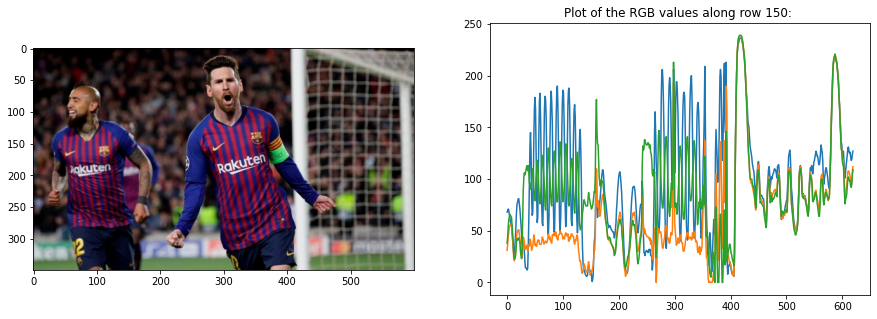

In [5]:
full_messi= cv2.imread("../images/messi.jpg")
full_messi = cv2.cvtColor(full_messi, cv2.COLOR_BGR2RGB)
#  Even though most default color space are RGB, Opencv opens images in the BGR color space and that's
#  That's why we convert the image to RGB space with the above commang. Try commenting the line above and see 
#  The image in BGR space.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(full_messi[0:350,0:600], cmap = 'gray')
plt.subplot(1,2,2).set_title("Plot of the RGB values along row 150: ")
plt.plot(full_messi[150,:])

The image is of the following dimensions given in the format (height, width, channel):

In [6]:
full_messi.shape

(349, 620, 3)

Given below is how we crop an image going from the origin to 150 row (Y-axis) and origin- 200 columns(X- axis) and turn them into grayscale.

shape of grayscale image is: (349, 200)


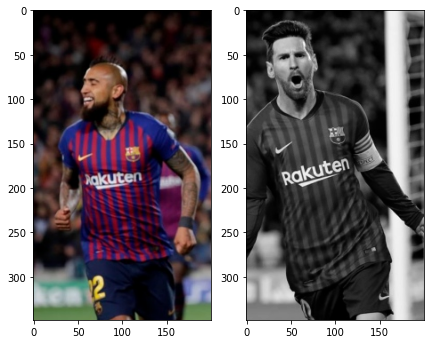

In [7]:
bald = full_messi[:,:200]
gray_bald = cv2.cvtColor(bald, cv2.COLOR_RGB2GRAY)
messi = full_messi[:, 250:450]
gray_messi = cv2.cvtColor(messi, cv2.COLOR_RGB2GRAY)
print("shape of grayscale image is:", (gray_messi.shape))
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.imshow(bald)
plt.subplot(122)
plt.imshow(gray_messi) 

# Adding and Blending two images: 

What happens when you add two images? 

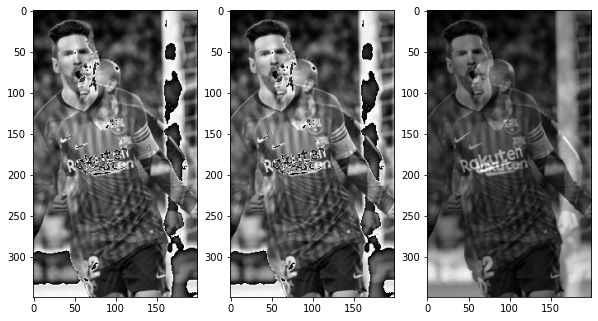

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(gray_bald + gray_messi)
plt.subplot(1,3,2)
plt.imshow((gray_bald + gray_messi)/2)
plt.subplot(1,3,3)
plt.imshow(gray_bald/2 + gray_messi/2)


We have excessive whites or excessive blacks because we are currenly using  8-bit (uint8) images: which means each pixel value can go from 0-255. in the above given addition operation, all the values that go above 255 are truncated to 255 which is white in our gray scale. where as on the right most image, we half the pixel values of each image and then add which gives us much better image when added since the addition still has values inside the [0,255] range.

It is also important to note that to add two images, both need to be of the same size because addition is an element-by-element operation.

In [9]:
def blend (a, b , alpha): 
    # A simple function that blends two images based on what percentage one image should dominate over the other.
    c = alpha * a + (1-alpha) * b
    return c 

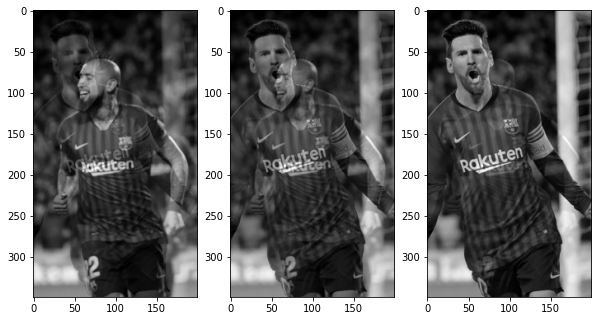

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(blend(gray_messi, gray_bald, 0.25))
plt.subplot(1,3,2)
plt.imshow(blend(gray_messi, gray_bald, 0.5))
plt.subplot(1,3,3)
plt.imshow(blend(gray_messi, gray_bald, 0.75))

In the images above you can see how the first image has only 25% of messi while subsequently the percentage of messi added to the sum gets bigger. 

# Image Difference: 

We will consider the following simpler images for this example. 

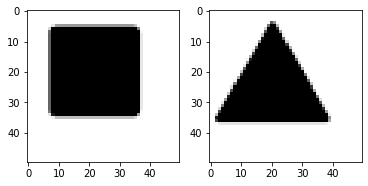

In [11]:
square =  cv2.cvtColor(cv2.imread("../images/basic_shapes.png"), cv2.COLOR_BGR2GRAY)[:50,:50]
triangle =  cv2.cvtColor(cv2.imread("../images/basic_shapes.png"), cv2.COLOR_BGR2GRAY)[:50, 125:175]

plt.figure()
plt.subplot(121)
plt.imshow(square)
plt.subplot(122)
plt.imshow(triangle)

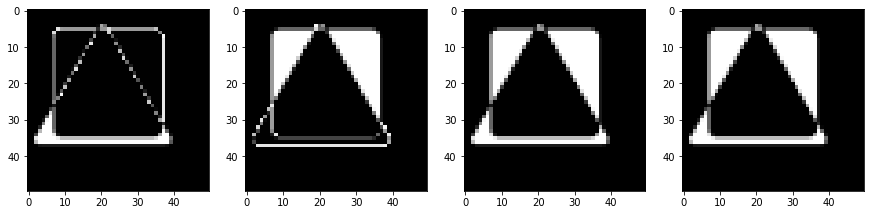

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(141)
plt.imshow(abs(square - triangle))
plt.subplot(142)
plt.imshow(abs(triangle - square)) 
plt.subplot(143)
plt.imshow(cv2.absdiff(square, triangle))
plt.subplot(144)
plt.imshow(cv2.absdiff(triangle , square))


In the above case, subtracting one image from the other it will give an image that only contains the areas where the second image has higher values than the first image.

Where as absdiff() gives you the absolute difference of where both the images differ and that's why the order of difference doesn't matter in this case.

// pseudocode for cv2.absdiff()
#Mat src1, src2, dst; 
#...
#for each row : r
    #for each column : c
        #for each channel : ch
            #dst(r,c,ch) = abs(src1(r,c,ch) - src2(r,c,ch))


# Noisy images: 

In the following section we will add random gaussian noise to an image, also known as salt and pepper noise 

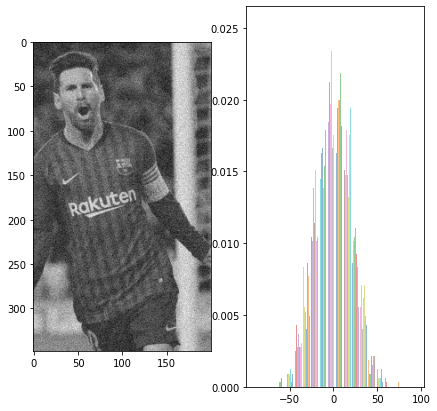

In [13]:
noise =np.random.normal(0,20,size=gray_messi.shape)
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.imshow(gray_messi + noise)
plt.subplot(122)
plt.hist(noise, bins = 20, density=True, alpha = 0.5)
plt.show()